In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('medical_cost.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot:>

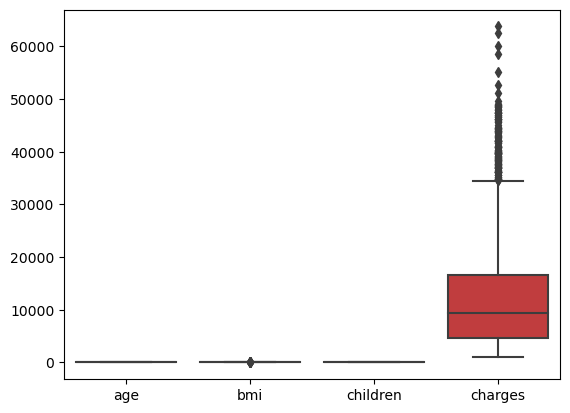

In [7]:
sns.boxplot(data=df)

In [8]:
import warnings as wr
wr.filterwarnings('ignore')

def outlier(df):
    df1=df.copy()
    df=df._get_numeric_data()
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-(1.5*iqr)
    upper_bound=q3+(1.5*iqr)
    
    for col in df.columns:
        for i in range(0,len(df[col])):
            if df[col][i] < lower_bound[col]:
                df[col][i] = lower_bound[col]
                
            if df[col][i] > upper_bound[col]:
                df[col][i] = upper_bound[col]
    
    for col in df.columns:
        df1[col]=df[col]
        
    return(df1)

df=outlier(df)

<AxesSubplot:>

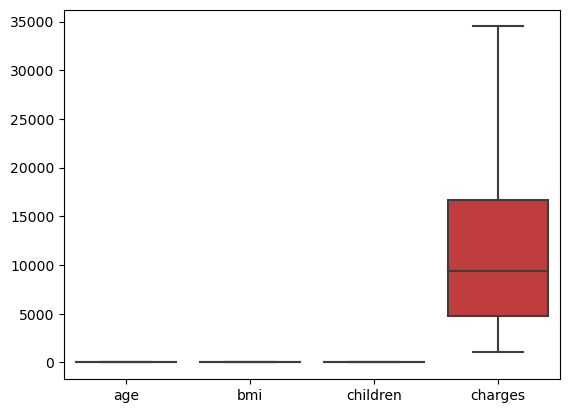

In [9]:
sns.boxplot(data=df)

In [10]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [11]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [12]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
df['smoker']=le.fit_transform(df['smoker'])

df = pd.get_dummies(df,columns=['region'],drop_first = True)

In [14]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


<AxesSubplot:>

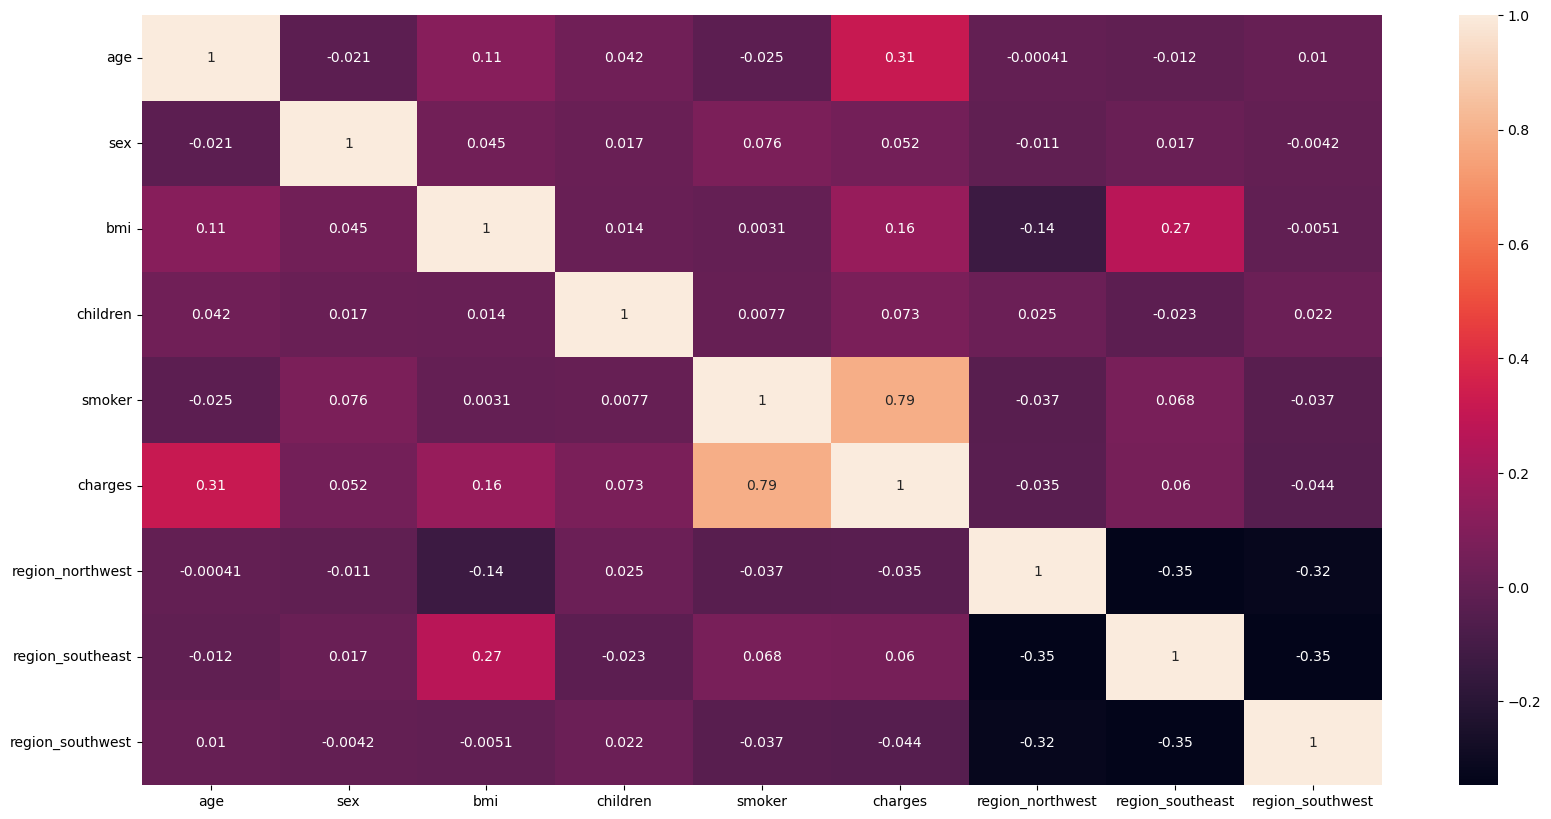

In [15]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot=True)

In [16]:
x = df.drop('charges',axis=1)
y = df['charges']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [18]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [19]:
y_pred = lr.predict(x_test)

In [20]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.764182820982451